<a href="https://colab.research.google.com/github/jtuchinsky/MathForML/blob/main/Linear_Algebra_Vectors_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import sqrt, pi, ceil, floor
import matplotlib
import matplotlib.patches
from matplotlib.collections import PatchCollection


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim, ylim

blue = 'C0'
black = 'k'
red = 'C3'
green = 'C2'
purple = 'C4'
orange = 'C2'
gray = 'gray'

class Polygon():
    def __init__(self, *vertices, color=blue, fill=None, alpha=0.4):
        self.vertices = vertices
        self.color = color
        self.fill = fill
        self.alpha = alpha

class Points():
    def __init__(self, *vectors, color=black):
        self.vectors = list(vectors)
        self.color = color

class Arrow():
    def __init__(self, tip, tail=(0,0), color=red):
        self.tip = tip
        self.tail = tail
        self.color = color

class Segment():
    def __init__(self, start_point, end_point, color=blue):
        self.start_point = start_point
        self.end_point = end_point
        self.color = color

# helper function to extract all the vectors from a list of objects
def extract_vectors(objects):
    for object in objects:
        if type(object) == Polygon:
            for v in object.vertices:
                yield v
        elif type(object) == Points:
            for v in object.vectors:
                yield v
        elif type(object) == Arrow:
            yield object.tip
            yield object.tail
        elif type(object) == Segment:
            yield object.start_point
            yield object.end_point
        else:
            raise TypeError("Unrecognized object: {}".format(object))

def draw(*objects, origin=True, axes=True, grid=(1,1), nice_aspect_ratio=True,
            width=6, save_as=None):

    all_vectors = list(extract_vectors(objects))
    xs, ys = zip(*all_vectors)

    max_x, max_y, min_x, min_y = max(0,*xs), max(0,*ys), min(0,*xs), min(0,*ys)

    #sizing
    if grid:
        x_padding = max(ceil(0.05*(max_x-min_x)), grid[0])
        y_padding = max(ceil(0.05*(max_y-min_y)), grid[1])

        def round_up_to_multiple(val,size):
            return floor((val + size) / size) * size

        def round_down_to_multiple(val,size):
            return -floor((-val - size) / size) * size

        plt.xlim(floor((min_x - x_padding) / grid[0]) * grid[0],
                ceil((max_x + x_padding) / grid[0]) * grid[0])
        plt.ylim(floor((min_y - y_padding) / grid[1]) * grid[1],
                ceil((max_y + y_padding) / grid[1]) * grid[1])

    if origin:
        plt.scatter([0],[0], color='k', marker='x')

    if grid:
        plt.gca().set_xticks(np.arange(plt.xlim()[0],plt.xlim()[1],grid[0]))
        plt.gca().set_yticks(np.arange(plt.ylim()[0],plt.ylim()[1],grid[1]))
        plt.grid(True)
        plt.gca().set_axisbelow(True)

    if axes:
        plt.gca().axhline(linewidth=2, color='k')
        plt.gca().axvline(linewidth=2, color='k')

    for object in objects:
        if type(object) == Polygon:
            for i in range(0,len(object.vertices)):
                x1, y1 = object.vertices[i]
                x2, y2 = object.vertices[(i+1)%len(object.vertices)]
                plt.plot([x1,x2],[y1,y2], color=object.color)
            if object.fill:
                xs = [v[0] for v in object.vertices]
                ys = [v[1] for v in object.vertices]
                plt.gca().fill(xs,ys,object.fill,alpha=object.alpha)
        elif type(object) == Points:
            xs = [v[0] for v in object.vectors]
            ys = [v[1] for v in object.vectors]
            plt.scatter(xs,ys,color=object.color)
        elif type(object) == Arrow:
            tip, tail = object.tip, object.tail
            tip_length = (xlim()[1] - xlim()[0]) / 20.
            length = sqrt((tip[1]-tail[1])**2 + (tip[0]-tail[0])**2)
            new_length = length - tip_length
            new_y = (tip[1] - tail[1]) * (new_length / length)
            new_x = (tip[0] - tail[0]) * (new_length / length)
            plt.gca().arrow(tail[0], tail[1], new_x, new_y,
            head_width=tip_length/1.5, head_length=tip_length,
            fc=object.color, ec=object.color)
        elif type(object) == Segment:
            x1, y1 = object.start_point
            x2, y2 = object.end_point
            plt.plot([x1,x2],[y1,y2], color=object.color)
        else:
            raise TypeError("Unrecognized object: {}".format(object))

    fig = matplotlib.pyplot.gcf()

    if nice_aspect_ratio:
        coords_height = (ylim()[1] - ylim()[0])
        coords_width = (xlim()[1] - xlim()[0])
        fig.set_size_inches(width , width * coords_height / coords_width)

    if save_as:
        plt.savefig(save_as)

    plt.show()

# Vectors

## What Is Vector

Simply put, a vector is an arrow in space with a specific direction and length, often
representing a piece of data.

### Declaring vector in Python using *numpy*

In [ ]:
import numpy as np
v = np.array([1, 2, 3])
print(v)

[1 2 3]


## Adding and Combining Vectors

$$\vec{u} = \begin{pmatrix}
a \\ b\\
\end{pmatrix},
\vec{v} = \begin{pmatrix}
c \\ d\\
\end{pmatrix}
$$

Then,
$$\vec{u} + \vec{v} = \begin{pmatrix}
a+c \\ b+d\\
\end{pmatrix}
$$

[7 3]


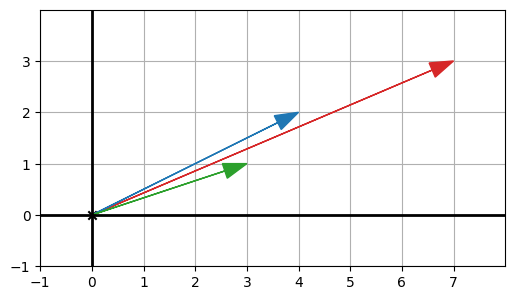

In [ ]:
u = np.array([4,2])
v = np.array([3,1])

u_plus_v = u+v
print(u_plus_v)

draw(
    Arrow(u_plus_v, color=red),
    Arrow(u, color=blue),
    Arrow(v, color=green))

## Scaling Vectors

*Scaling* is growing or shrinking a vector’s length. You can grow/shrink a vector by multiplying or scaling it with a single value, known as a *scalar*.

$$\vec{u} = \begin{pmatrix}
a \\ b\\
\end{pmatrix},
\\s*\vec{v} = \begin{pmatrix}
a*s \\ b*s\\
\end{pmatrix}
$$

[6 4]


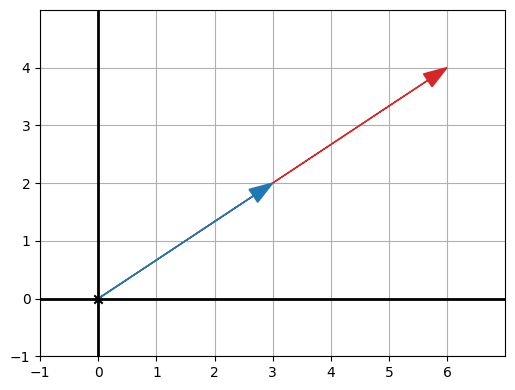

In [ ]:
u = np.array([3,2])
s = 2

u_scaled = s*u
print(u_scaled)

draw(Arrow(u_scaled, color=red), Arrow(u, color=blue))


## Scalar Product of Two Vectors
The dot product (also called the *inner product*) is an operation on two vectors that
returns a scalar.

Given
$$
\vec{u} = (u_1, u_2, ..., u_n)\\
\vec{v} = (v_1, v_2, ..., v_n)\\
$$

Then,
$$\vec(u) \odot \vec(v) = \Sigma_1^n u_n*v_n
$$


The scalar product of two vectors v and u with magnitude |v| and |u| is given as $|u|*|v|*cos(Θ)$
where  $\Theta$ is an angle between two vectors.


## Change of Coordinates Matrix
Let $\mathbf{B} = \{u, v\}$ and $\mathbf{B^{\prime}} = \{u^{\prime}, v^{\prime}\}$ be two bases for $\mathbf{R^2}$

If
$\vec{u_B} = \begin{pmatrix}
a \\ b\\
\end{pmatrix}, \text{and}\space
\vec{v_B} = \begin{pmatrix}
c \\ d\\
\end{pmatrix}
$

Then,
$\mathbf{P} = \begin{pmatrix}
a & c\\
b & d\\
\end{pmatrix}
$ is the **change of coordinates matrix** from $\mathbf{B}$ to $\mathbf{B^{\prime}}$.

That is for any $\mathbf{v} \in \mathbf{V}$,  
$$
\mathbf{[v]_B}\space= \mathbf{P * [v]_{B^{\prime}}}\\
\mathbf{[v]_{B^{\prime}}} = \mathbf{P^{-1} * [v]_B}\\
$$


### Example

Let
$B =
\begin{Bmatrix}
\begin{bmatrix}
1 \\ 0\\
\end{bmatrix} &
\begin{bmatrix}
0 \\ 1\\
\end{bmatrix}
\end{Bmatrix}
\text{, and }
B^{\prime} =
\begin{Bmatrix}
\begin{bmatrix}
3 \\ 1\\
\end{bmatrix} &
\begin{bmatrix}
-2 \\ 1\\
\end{bmatrix}
\end{Bmatrix}
$.
The vector **v** with coordinates $[v]_{B^{\prime}} = \begin{bmatrix}2\\1 \end{bmatrix}$ relative to the basis $B^{\prime}$ has coordinates
$$
[v]_B =
\begin{bmatrix}
3 & -2\\
1 &1
\end{bmatrix}
\begin{bmatrix}
2\\1
\end{bmatrix} =
\begin{bmatrix}
4\\3
\end{bmatrix}
$$
relative to the basis **B**.




In [ ]:
# Original vector
v = np.array([3,2])

# Original basis vectors
B1 = np.array([[1,0], [0,1]])

# New basis vector
B2 = np.array([[1, 1],[1, -1]])

# This matrix transforms vectors from the new basis to the old basis.
# It's simply the matrix with the new basis vectors as columns.
C = np.column_stack(B2)

# This matrix transforms vectors from the old basis to the new basis.
# It's simply the inverse of the change of coordinates matrix.
C_inv = np.linalg.inv(C)

#  Transform the vector to new basis
v_new = C_inv @ v

print(v_new)

[2.5 0.5]
